In [43]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import math
from skimage import data
from skimage.filters import threshold_otsu

# Example 3D scan

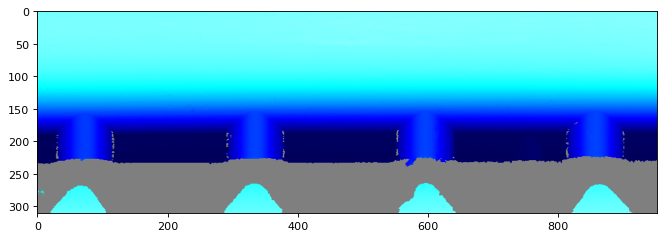

In [44]:
im = cv.imread(r'I:\220331\20220331_092419\3D_S018_R071_220331_092554.png')
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
figure(figsize = (10, 5), dpi=80)
plt.imshow(im)

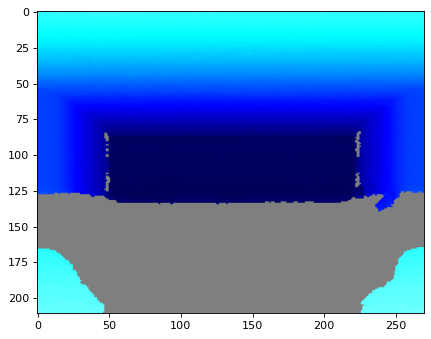

In [45]:
roi = im[100:im.shape[0],330:600]
figure(figsize = (10, 5), dpi=80)
plt.imshow(roi)

Max value on the image: 1443


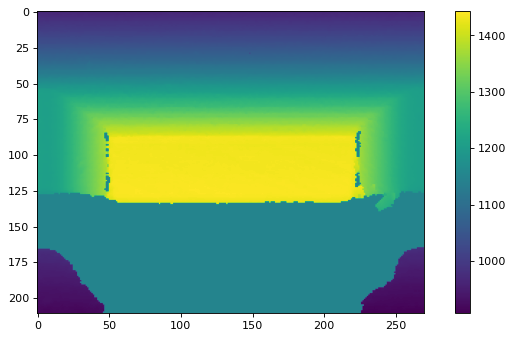

In [46]:
r,g,b = cv.split(roi)
sx,sy = r.shape
sum1 = np.zeros(shape=[sx, sy, 1], dtype=np.uint16)

for x in range(sx):
    for y in range(sy):

        if(r[x,y] == 255 or (b[x,y]) == 0 and g[x,y] == 0):
            sum1[x,y] = (int)(r[x,y]) + (int)(g[x,y]) + (int)(b[x,y])  
        else:
            sum1[x,y] = 6*255 - r[x,y] - g[x,y] - b[x,y]
                
figure(figsize = (10, 5), dpi=80)
plt.imshow(sum1)
plt.colorbar()
filtered = sum1[sum1 > 0]

print("Max value on the image:",sum1[:].max() ) 
max_val = sum1[:].max()


[ 40  78 129 174 222 283]
Last peak: 1415


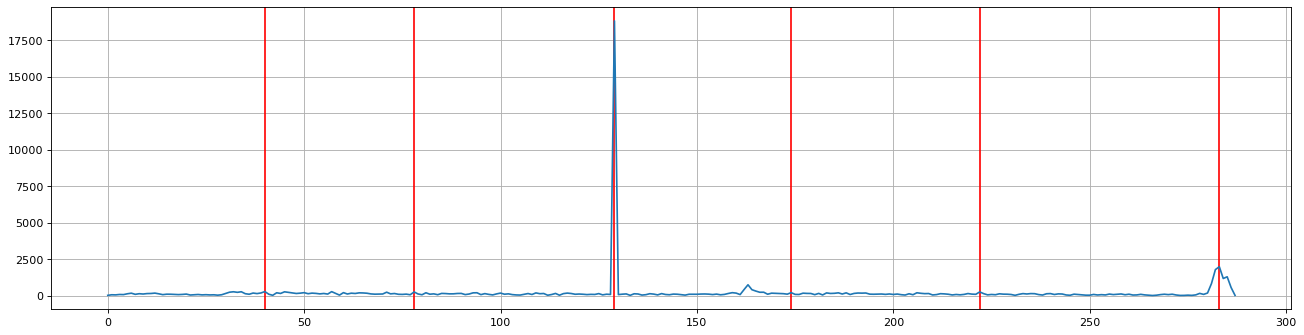

In [47]:
import numpy as np 
from scipy.signal import find_peaks

combine_hist = 5
hist, bins = np.histogram(filtered,bins = int(max_val/combine_hist))

peaks, props = find_peaks(hist,threshold=30,distance=35)
print(peaks)

figure(figsize = (20, 5), dpi=80)
for peak in peaks:
    plt.axvline(peak,color='red')
plt.grid(True)
plt.plot(hist)


print("Last peak:",peaks[-1]*combine_hist)
i = peaks[-1]*combine_hist


Range: 1405 1425


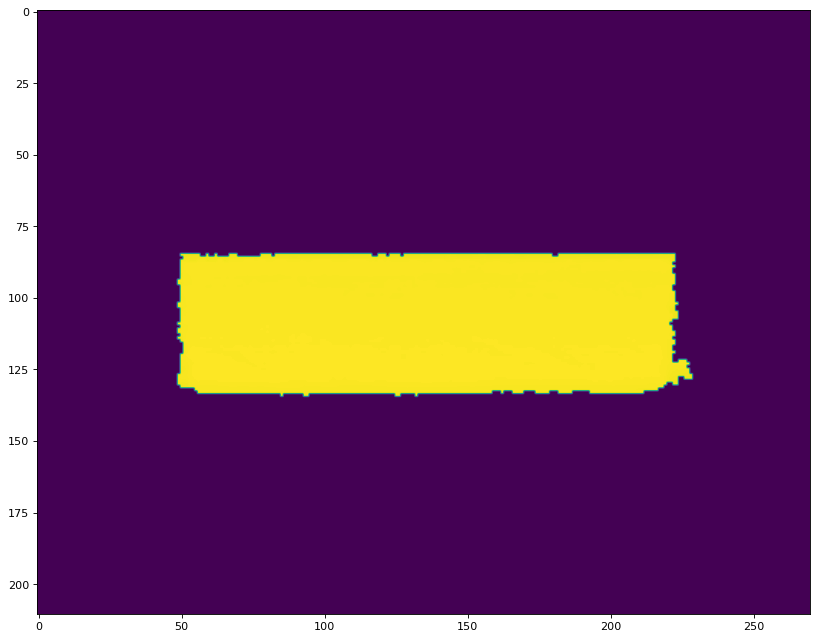

In [48]:
tresh = 10
tresh_asymetry = 5

print("Range:",i-tresh,i+tresh)
for x in range(sx):
    for y in range(sy):
        if sum1[x][y]> i+tresh*tresh_asymetry or sum1[x][y]< i-tresh: sum1[x][y]=0

figure(figsize = (20, 10), dpi=80)
plt.imshow(sum1)

In [49]:
def flatten(t):
    return [item for sublist in t for item in sublist]

sum1v = flatten(sum1)
sum2v = []
for v in sum1v:
    if v>0: sum2v.append(int(v)) 

scale_min = min(sum2v)
scale_max = max(sum2v)

scale_range = scale_max - scale_min + 50

In [50]:
for x in range(sum1.shape[0]):
    for y in range(sum1.shape[1]):
        v = sum1[x][y]
        if(v>0):
            sum1[x][y] = int((v - scale_min)/scale_range*1400)

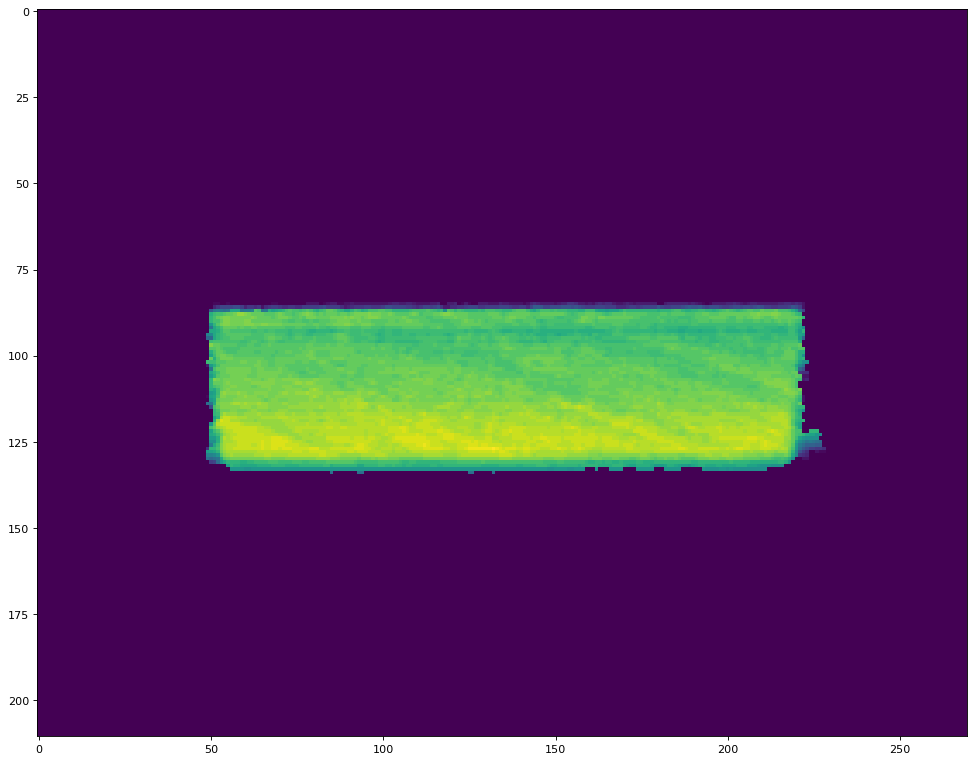

In [51]:
figure(figsize = (15, 15), dpi=80)
plt.imshow(sum1)

In [52]:
from skspatial.objects import Plane
from skspatial.objects import Points
from skspatial.plotting import plot_3d

points = []
for x in range(sum1.shape[0]):
    for y in range(sum1.shape[1]):
        if int(sum1[x][y])>0: points.append([x,y,int(sum1[x][y])])

points = Points(points)
plane = Plane.best_fit(points)


In [53]:
print(plane)

Plane(point=Point([109.03216999, 136.1432811 , 452.53881766]), normal=Vector([ 0.9976131 , -0.00947874, -0.06839776]))


In [54]:
print(plane.vector)
print(plane.point)

x0,y0,z0 = plane.vector
A,B,C = plane.point

points2 = []
for x in range(sum1.shape[0]):
    for y in range(sum1.shape[1]):
        if int(sum1[x][y])>0: points2.append([x,y, -( (x-x0)*A + (y-y0)*B )/C + z0 ])

points2 = Points(points2)

[ 0.9976131  -0.00947874 -0.06839776]
[109.03216999 136.1432811  452.53881766]


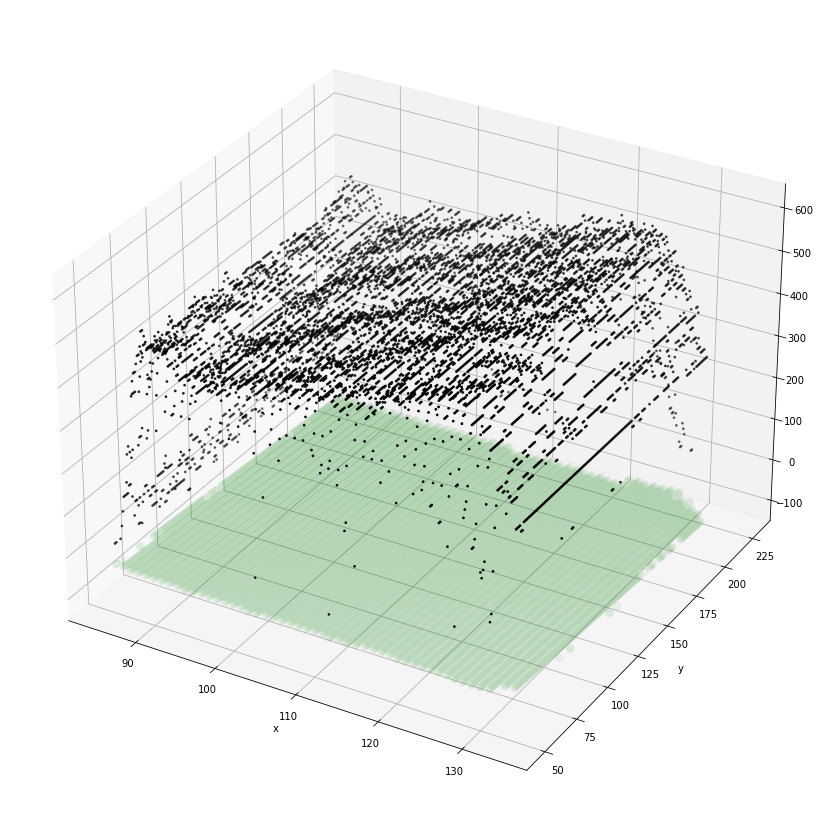

In [55]:
plt.rcParams['figure.figsize'] = [15, 15]

plot_3d(
    points.plotter(c='k', s=3, depthshade=True),
    points2.plotter(c='g', s=50, depthshade=True,alpha=0.05),
    #plane.plotter(alpha=0.5, lims_x=(70, 120), lims_y=(80, 120)),

)
plt.xlabel("x")
plt.ylabel("y")


plt.savefig("D:\Konrad/test.png")


In [56]:
xs,ys,zs = [],[],[]
for x in range(sum1.shape[0]):
    for y in range(sum1.shape[1]):
        if int(sum1[x][y])>0: 
            xs.append(x)
            ys.append(y)
            zs.append(sum1[x][y])
xs = list(xs)
ys= list(ys)
zs= list(zs)